In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# from sklearn.grid_search import GridSearchCV

In [2]:
username = "privateuser"
password = "x3h0q2i3b1"
port = 7777

engine = create_engine('mysql+mysqldb://%s:%s@localhost:%i/Shutterfly'%(username, password, port))

In [3]:
def load_dataset(split="trn_set", limit=None, ignore_categorical=False):
    sql = """
    SELECT o.*, f1.*, f2.*, f3.*, f4.*,
    EXTRACT(MONTH FROM o.dt) AS month
    FROM %s AS t 
    JOIN Online AS o 
        ON t.index = o.index 
    JOIN features_group_1 AS f1
        ON t.index = f1.index
    JOIN features_group_2 AS f2
        ON t.index = f2.index
    JOIN features_group_3 AS f3
        ON t.index = f3.index
    JOIN features_group_4 AS f4
        ON t.index = f4.index
    """%split
    if limit:
        sql += " LIMIT %i"%limit
    
    df = pd.read_sql_query(sql.replace('\n', " ").replace("\t", " "), engine)
    df.event1 = df.event1.fillna(0)
    X = df.drop(["index", "event2", "dt", "day", "session", "visitor", "custno"], axis=1)
    
    if ignore_categorical:
        X = X.drop(["last_category", "event1", "month", "last_event1", 
                    "last_event2", "last_prodcat1", "last_prodcat2"], axis=1)
    Y = df.event2
    return X, Y

In [4]:
X_trn, Y_trn = load_dataset("tst_set", limit=10000)

In [5]:
print(X_trn.head(5).T)

                         0        1        2       3       4
category              1.00    1.000    1.000    1.00    1.00
event1                0.00    0.000    0.000    0.00    0.00
order_count           1.00    2.000    2.000    1.00    1.00
revenue_sum          30.49  191.330  191.330   76.96   66.77
revenue_max          30.49   98.380   98.380   76.96   66.77
revenue_min          30.49   92.950   92.950   76.96   66.77
rev_p_order          30.49   95.665   95.665   76.96   66.77
prodcat1_count        1.00    2.000    2.000    1.00    1.00
prodcat2_count        1.00    2.000    2.000    1.00    1.00
days_last_order     270.00  311.000  311.000  137.00  202.00
days_last_prodcat1  270.00  311.000  311.000  137.00  202.00
days_last_prodcat2  270.00  311.000  311.000  137.00  202.00
prodcat1_1_count      0.00    2.000    2.000    0.00    0.00
prodcat1_2_count      1.00    0.000    0.000    1.00    0.00
prodcat1_3_count      0.00    0.000    0.000    0.00    1.00
prodcat1_4_count      0.

In [6]:
import matplotlib.pyplot as plt

In [7]:
for col in ["last_category", "event1", "month", "last_event1", "last_event2", "last_prodcat1", "last_prodcat2"]:
     if col in X_trn.columns:
            print(col)

last_category
event1
month
last_event1
last_event2
last_prodcat1
last_prodcat2


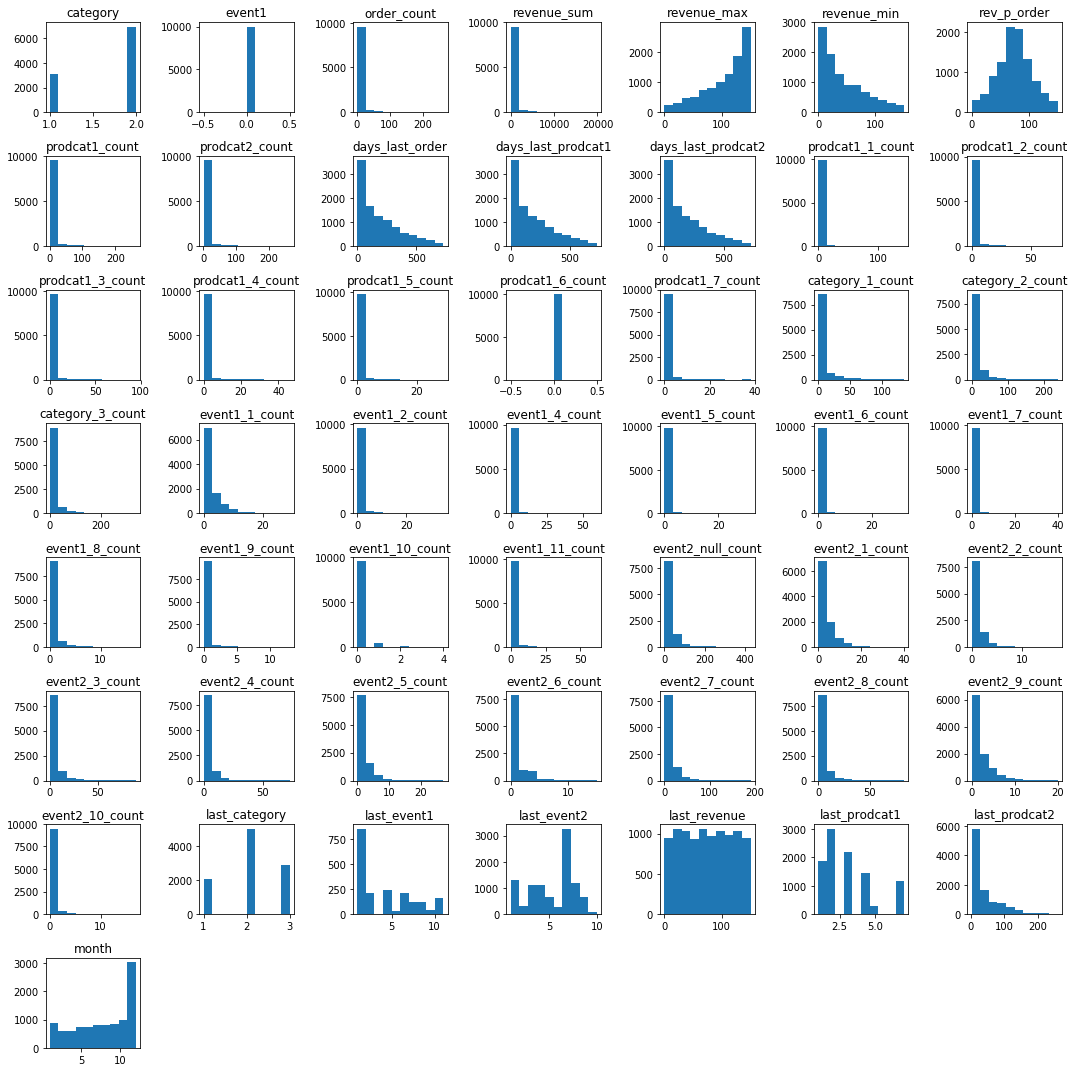

In [8]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(X_trn.columns):
    ax = plt.subplot(8, 7, i + 1)

    ax.hist(X_trn[col].dropna())
    
    ax.set_title(col)
plt.tight_layout()
plt.savefig("figs/features.png")